In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [5]:
#STEP 1: Load Dataset 
# Replace with your dataset file
df = pd.read_csv("uber.csv")

print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

Dataset Preview:
    Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647            

In [7]:
#STEP 2: Descriptive Statistics 
desc_stats = numeric_df.describe().T
print("\nDescriptive Statistics:\n", desc_stats)


Descriptive Statistics:
                       count          mean           std          min  \
Unnamed: 0         200000.0  2.771250e+07  1.601382e+07     1.000000   
fare_amount        200000.0  1.135996e+01  9.901776e+00   -52.000000   
pickup_longitude   200000.0 -7.252764e+01  1.143779e+01 -1340.648410   
pickup_latitude    200000.0  3.993589e+01  7.720539e+00   -74.015515   
dropoff_longitude  199999.0 -7.252529e+01  1.311741e+01 -3356.666300   
dropoff_latitude   199999.0  3.992389e+01  6.794829e+00  -881.985513   
passenger_count    200000.0  1.684535e+00  1.385997e+00     0.000000   

                            25%           50%           75%           max  
Unnamed: 0         1.382535e+07  2.774550e+07  4.155530e+07  5.542357e+07  
fare_amount        6.000000e+00  8.500000e+00  1.250000e+01  4.990000e+02  
pickup_longitude  -7.399206e+01 -7.398182e+01 -7.396715e+01  5.741846e+01  
pickup_latitude    4.073480e+01  4.075259e+01  4.076716e+01  1.644421e+03  
dropoff_longitude

In [9]:
# STEP 3: Skewness and Kurtosis 
skew_kurt = pd.DataFrame({
    "Skewness": numeric_df.apply(skew),
    "Kurtosis": numeric_df.apply(kurtosis)
})
print("\nSkewness and Kurtosis:\n", skew_kurt)

# Merge with descriptive stats
summary = desc_stats.join(skew_kurt)
print("\nComplete Summary Statistics:\n", summary)


Skewness and Kurtosis:
                     Skewness      Kurtosis
Unnamed: 0         -0.001828     -1.200247
fare_amount         4.504813     63.882687
pickup_longitude   -7.495833   1143.998828
pickup_latitude    62.976383  12868.918745
dropoff_longitude        NaN           NaN
dropoff_latitude         NaN           NaN
passenger_count    18.145385   2456.560364

Complete Summary Statistics:
                       count          mean           std          min  \
Unnamed: 0         200000.0  2.771250e+07  1.601382e+07     1.000000   
fare_amount        200000.0  1.135996e+01  9.901776e+00   -52.000000   
pickup_longitude   200000.0 -7.252764e+01  1.143779e+01 -1340.648410   
pickup_latitude    200000.0  3.993589e+01  7.720539e+00   -74.015515   
dropoff_longitude  199999.0 -7.252529e+01  1.311741e+01 -3356.666300   
dropoff_latitude   199999.0  3.992389e+01  6.794829e+00  -881.985513   
passenger_count    200000.0  1.684535e+00  1.385997e+00     0.000000   

                       


Correlation Matrix:
                    Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000589          0.000230        -0.000341   
fare_amount          0.000589     1.000000          0.010457        -0.008481   
pickup_longitude     0.000230     0.010457          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002257     0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002257  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.774

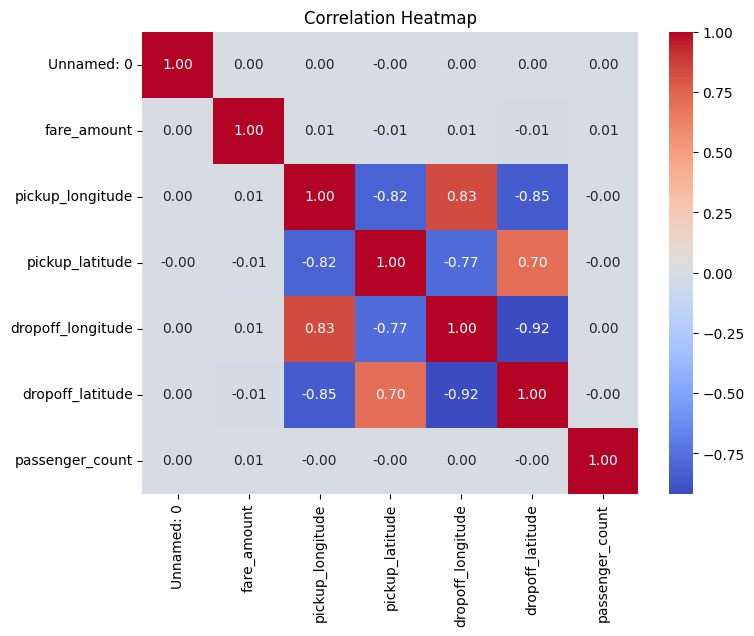

In [11]:
# STEP 4: Correlation Matrix 
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()